Classification using TesorFlow's AlexNet for CNN

In [1]:
# import statements
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import time
from PIL import Image
from torchvision import transforms
import numpy as np

In [2]:
# check TensorFlow version
print(tf.__version__)

2.8.0


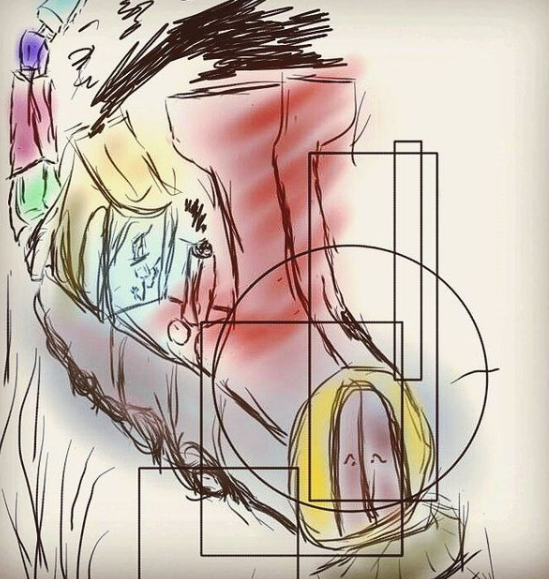

In [3]:
# load test image
image_path = "./testImage.png"
Image.open(image_path)

In [4]:
# convert png to tensor
def convert_png_to_tensor(image_path):
  img = open(image_path, 'rb').read()
  img_tensor = tf.image.decode_png(img)
  return img_tensor

img_tensor = convert_png_to_tensor(image_path)
print("Shape of image:",img_tensor.shape, "\n")
img_tensor
# convert_tensor = transforms.ToTensor()
# imgTensor = convert_tensor(imagePng)
# print("Shape of image: {}".format(imgTensor.shape))
# imgTensor

Shape of image: (579, 549, 3) 



<tf.Tensor: shape=(579, 549, 3), dtype=uint8, numpy=
array([[[197, 190, 178],
        [198, 191, 180],
        [198, 192, 180],
        ...,
        [193, 187, 173],
        [192, 186, 172],
        [194, 185, 172]],

       [[197, 190, 179],
        [198, 192, 180],
        [198, 192, 180],
        ...,
        [194, 188, 174],
        [195, 188, 174],
        [195, 186, 173]],

       [[198, 191, 179],
        [198, 192, 180],
        [199, 193, 181],
        ...,
        [196, 191, 176],
        [196, 190, 176],
        [197, 188, 175]],

       ...,

       [[166, 150, 134],
        [166, 151, 135],
        [167, 151, 136],
        ...,
        [160, 143, 127],
        [158, 141, 126],
        [157, 141, 126]],

       [[165, 149, 133],
        [166, 150, 134],
        [166, 151, 135],
        ...,
        [159, 142, 126],
        [158, 141, 125],
        [157, 141, 126]],

       [[165, 149, 132],
        [166, 150, 134],
        [166, 151, 135],
        ...,
        [155, 137, 12

In [5]:
# resize images to (277, 277, 3) - AlexNet uses this size as input
def resize_image(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (227,227))
    return image

img_resized = resize_image(img_tensor)

print("Shape of image: {}".format(img_resized.shape))
img_resized

Shape of image: (227, 227, 3)


<tf.Tensor: shape=(227, 227, 3), dtype=float32, numpy=
array([[[ 0.21761312,  0.11363609, -0.07360401],
        [ 0.23685798,  0.14219601, -0.05330614],
        [ 0.26170295,  0.19722201, -0.00666982],
        ...,
        [ 0.236777  ,  0.14005561, -0.08562759],
        [ 0.18533933,  0.09021536, -0.13706525],
        [ 0.16517995,  0.04553456, -0.17546232]],

       [[ 0.2260272 ,  0.1246189 , -0.06729595],
        [ 0.2779752 ,  0.18331325, -0.0101295 ],
        [ 0.29203603,  0.22755511,  0.02885731],
        ...,
        [ 0.28710613,  0.1932554 , -0.03529846],
        [ 0.24573562,  0.14968589, -0.07666895],
        [ 0.2176489 ,  0.10314122, -0.11412831]],

       [[ 0.25255212,  0.15114382, -0.03819012],
        [ 0.30315524,  0.21029866,  0.01505052],
        [ 0.30380344,  0.23932251,  0.04497754],
        ...,
        [ 0.33423945,  0.23751809,  0.01183488],
        [ 0.27279294,  0.17787772, -0.04780549],
        [ 0.24991281,  0.13772212, -0.08327475]],

       ...,

     

In [6]:
# create train_img, train_label
# currently there is only 1 image for testing

train_img = np.array([img_resized])
print("Size of training set: {}".format(train_img.shape))
train_label = np.array([[0]])

Size of training set: (1, 227, 227, 3)


In [7]:
# generate dataset for training, validation and testing
train_ds = tf.data.Dataset.from_tensor_slices((train_img, train_label))
train_ds = train_ds.batch(batch_size=1, drop_remainder=True)

# To be added
# test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
# validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [8]:
# Model - parameters can be tuned
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
# using cross-entrophy as loss function, stochastic gradient descent with learning rate of 0.001 as optimizer
# feel free to tune learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
# check type
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(1, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 1), dtype=tf.int64, name=None))>

In [12]:
# train model
model.fit(train_ds,
          epochs=1,
          validation_data=train_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

1/1 [==============================] - 4s 4s/step - loss: 1.5334 - accuracy: 0.0000e+00 - val_loss: 1.1743 - val_accuracy: 1.0000
